In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import  precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

## Generate dataset

In [2]:
def generate_dataset(b, k, n):
    beta = np.array([b] * 5 + [0] * k)
    X_gen = np.random.normal(loc=0, scale=1, size=(n, k + 5))
    p = 1 / (1 + np.exp(-(X_gen.dot(beta))))
    y_gen = np.random.binomial(1, p)

    X_gen = pd.DataFrame(X_gen)
    y_gen = pd.Series(y_gen)

    return X_gen, y_gen

X_gen, y_gen = generate_dataset(1, 20, 1000)

## Load dataset

In [3]:
def load_dataset(test_size=0.2):
    df = pd.read_csv("data/abalone.csv")
    df = df.loc[df["Type"] != "I", :]
    df.loc[df["Type"] == 'M', ["Type"]] = 1
    df.loc[df["Type"] == 'F', ["Type"]] = 0
    df["Type"] = df["Type"].astype(int)
    
    X = df.drop(columns=["Type"], axis=1)
    y = df["Type"]
    
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    
    return X, y

X, y = load_dataset()

## Fit classification models

In [4]:
tree_c = DecisionTreeClassifier()
logistic_c = LogisticRegression()

tree_c.fit(X_gen, y_gen)
logistic_c.fit(X_gen, y_gen)

LogisticRegression()

## Classification error

In [6]:
iters = 10

### Refitting

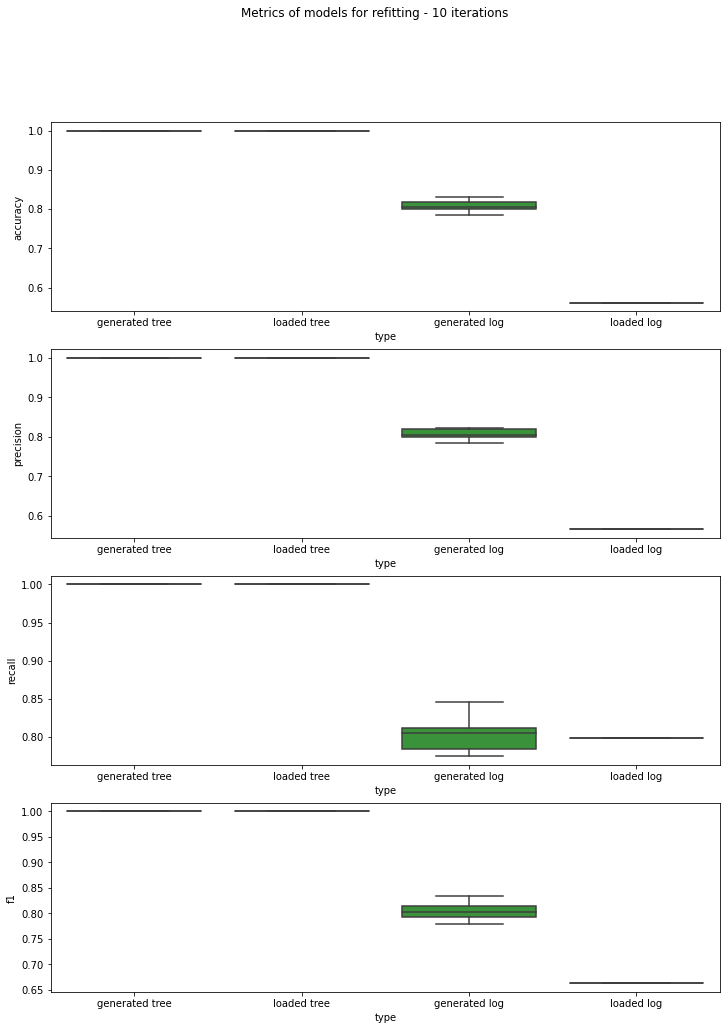

In [7]:
accuracies = []
precisions = []
recalls = []
f1s = []

for _ in range(iters):
    X_gen, y_gen = generate_dataset(1, 20, 1000)
    X, y = load_dataset()

    # Decision tree
    model = DecisionTreeClassifier()

    model.fit(X_gen, y_gen)
    accuracies.append(accuracy_score(y_gen, model.predict(X_gen)))
    precisions.append(precision_score(y_gen, model.predict(X_gen)))
    recalls.append(recall_score(y_gen, model.predict(X_gen)))
    f1s.append(f1_score(y_gen, model.predict(X_gen)))

    model.fit(X, y)
    accuracies.append(accuracy_score(y, model.predict(X)))
    precisions.append(precision_score(y, model.predict(X)))
    recalls.append(recall_score(y, model.predict(X)))
    f1s.append(f1_score(y, model.predict(X)))

    # Logistic
    model = LogisticRegression()
    
    model.fit(X_gen, y_gen)
    accuracies.append(accuracy_score(y_gen, model.predict(X_gen)))
    precisions.append(precision_score(y_gen, model.predict(X_gen)))
    recalls.append(recall_score(y_gen, model.predict(X_gen)))
    f1s.append(f1_score(y_gen, model.predict(X_gen)))

    model.fit(X, y)
    accuracies.append(accuracy_score(y, model.predict(X)))
    precisions.append(precision_score(y, model.predict(X)))
    recalls.append(recall_score(y, model.predict(X)))
    f1s.append(f1_score(y, model.predict(X)))

results = pd.DataFrame({
    "accuracy": accuracies,
    "recall": recalls,
    "precision": precisions,
    "f1": f1s,
    "type": ["generated tree", "loaded tree", "generated log", "loaded log"] * iters,
})

f, axes = plt.subplots(4, 1, figsize=(12, 16))

sns.boxplot(data=results, x="type", y="accuracy", ax=axes[0])
sns.boxplot(data=results, x="type", y="precision", ax=axes[1])
sns.boxplot(data=results, x="type", y="recall", ax=axes[2])
sns.boxplot(data=results, x="type", y="f1", ax=axes[3])

plt.suptitle(f"Metrics of models for refitting - {iters} iterations")
plt.show()

### 10-fold cross-validation

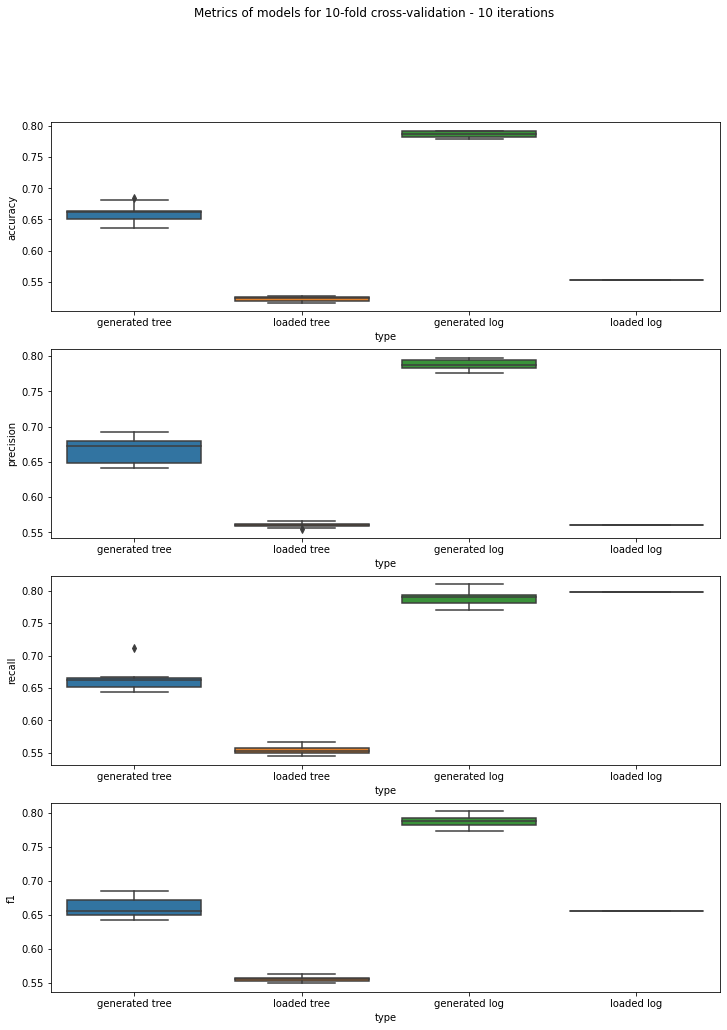

In [8]:
accuracies = []
precisions = []
recalls = []
f1s = []

for _ in range(iters):
    X_gen, y_gen = generate_dataset(1, 20, 1000)
    X, y = load_dataset()
    
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    # Decision tree
    model = DecisionTreeClassifier()
    accuracies.append(
        np.mean(cross_validate(estimator=model, X=X_gen, y=y_gen, cv=10, scoring=scoring)['test_accuracy'])
    )
    precisions.append(
        np.mean(cross_validate(estimator=model, X=X_gen, y=y_gen, cv=10, scoring=scoring)['test_precision'])
    )
    recalls.append(
        np.mean(cross_validate(estimator=model, X=X_gen, y=y_gen, cv=10, scoring=scoring)['test_recall'])
    )
    f1s.append(
        np.mean(cross_validate(estimator=model, X=X_gen, y=y_gen, cv=10, scoring=scoring)['test_f1'])
    )

    accuracies.append(
        np.mean(cross_validate(estimator=model, X=X, y=y, cv=10, scoring=scoring)['test_accuracy'])
    )
    precisions.append(
        np.mean(cross_validate(estimator=model, X=X, y=y, cv=10, scoring=scoring)['test_precision'])
    )
    recalls.append(
        np.mean(cross_validate(estimator=model, X=X, y=y, cv=10, scoring=scoring)['test_recall'])
    )
    f1s.append(
        np.mean(cross_validate(estimator=model, X=X, y=y, cv=10, scoring=scoring)['test_f1'])
    )

    # Logistic
    model = LogisticRegression()
    accuracies.append(
        np.mean(cross_validate(estimator=model, X=X_gen, y=y_gen, cv=10, scoring=scoring)['test_accuracy'])
    )
    precisions.append(
        np.mean(cross_validate(estimator=model, X=X_gen, y=y_gen, cv=10, scoring=scoring)['test_precision'])
    )
    recalls.append(
        np.mean(cross_validate(estimator=model, X=X_gen, y=y_gen, cv=10, scoring=scoring)['test_recall'])
    )
    f1s.append(
        np.mean(cross_validate(estimator=model, X=X_gen, y=y_gen, cv=10, scoring=scoring)['test_f1'])
    )

    accuracies.append(
        np.mean(cross_validate(estimator=model, X=X, y=y, cv=10, scoring=scoring)['test_accuracy'])
    )
    precisions.append(
        np.mean(cross_validate(estimator=model, X=X, y=y, cv=10, scoring=scoring)['test_precision'])
    )
    recalls.append(
        np.mean(cross_validate(estimator=model, X=X, y=y, cv=10, scoring=scoring)['test_recall'])
    )
    f1s.append(
        np.mean(cross_validate(estimator=model, X=X, y=y, cv=10, scoring=scoring)['test_f1'])
    )

results = pd.DataFrame({
    "accuracy": accuracies,
    "recall": recalls,
    "precision": precisions,
    "f1": f1s,
    "type": ["generated tree", "loaded tree", "generated log", "loaded log"] * iters,
})

f, axes = plt.subplots(4, 1, figsize=(12, 16))

sns.boxplot(data=results, x="type", y="accuracy", ax=axes[0])
sns.boxplot(data=results, x="type", y="precision", ax=axes[1])
sns.boxplot(data=results, x="type", y="recall", ax=axes[2])
sns.boxplot(data=results, x="type", y="f1", ax=axes[3])

plt.suptitle(f"Metrics of models for 10-fold cross-validation - {iters} iterations")
plt.show()

### Bootstrap method

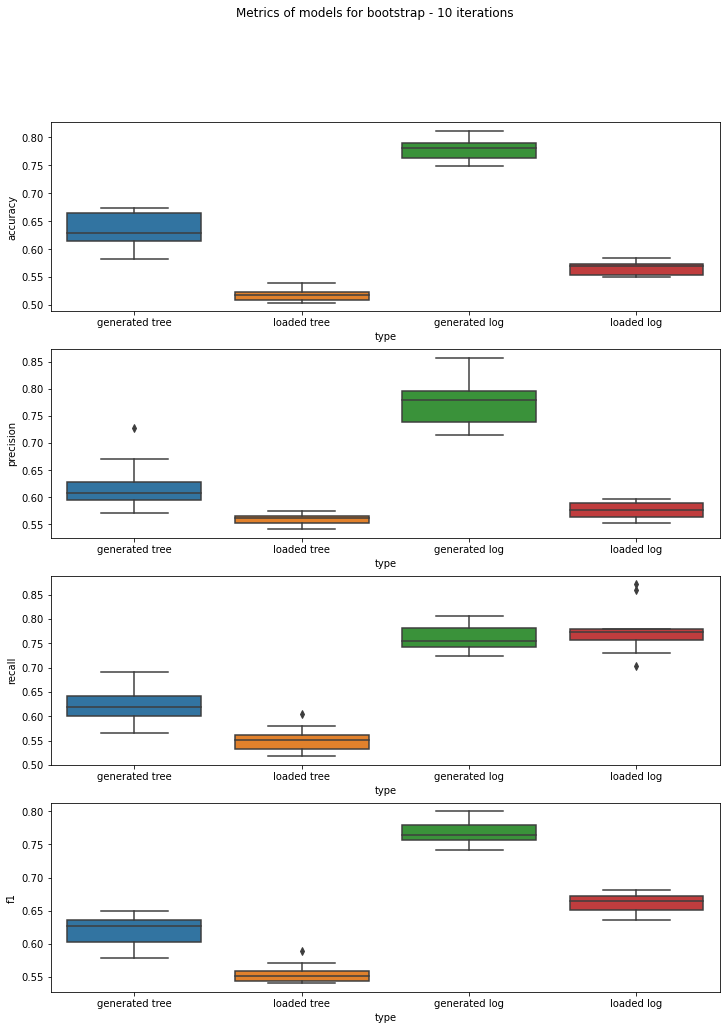

In [9]:
accuracies = []
precisions = []
recalls = []
f1s = []

for _ in range(iters):
    X, y = load_dataset()
    X_b, y_b = resample(X, y, n_samples=X.shape[0])
    X_b_oob = X.iloc[list(np.delete(X.index.values, np.unique(X_b.index.values))), :]
    y_b_oob = y.iloc[list(np.delete(X.index.values, np.unique(X_b.index.values)))]

    X_gen, y_gen = generate_dataset(1, 20, 1000)
    X_gen_b, y_gen_b = resample(X_gen, y_gen, n_samples=X_gen.shape[0])
    X_gen_b_oob = X_gen.iloc[list(np.delete(X_gen.index.values, np.unique(X_gen_b.index.values))), :]
    y_gen_b_oob = y_gen.iloc[list(np.delete(X_gen.index.values, np.unique(X_gen_b.index.values)))]

    scoring = ['accuracy', 'precision', 'recall', 'f1']

    # Decision tree
    # Decision tree
    model = DecisionTreeClassifier()

    model.fit(X_gen_b, y_gen_b)
    accuracies.append(accuracy_score(y_gen_b_oob, model.predict(X_gen_b_oob)))
    precisions.append(precision_score(y_gen_b_oob, model.predict(X_gen_b_oob)))
    recalls.append(recall_score(y_gen_b_oob, model.predict(X_gen_b_oob)))
    f1s.append(f1_score(y_gen_b_oob, model.predict(X_gen_b_oob)))

    model.fit(X_b, y_b)
    accuracies.append(accuracy_score(y_b_oob, model.predict(X_b_oob)))
    precisions.append(precision_score(y_b_oob, model.predict(X_b_oob)))
    recalls.append(recall_score(y_b_oob, model.predict(X_b_oob)))
    f1s.append(f1_score(y_b_oob, model.predict(X_b_oob)))

    # Logistic
    model = LogisticRegression()
    
    model.fit(X_gen_b, y_gen_b)
    accuracies.append(accuracy_score(y_gen_b_oob, model.predict(X_gen_b_oob)))
    precisions.append(precision_score(y_gen_b_oob, model.predict(X_gen_b_oob)))
    recalls.append(recall_score(y_gen_b_oob, model.predict(X_gen_b_oob)))
    f1s.append(f1_score(y_gen_b_oob, model.predict(X_gen_b_oob)))

    model.fit(X_b, y_b)
    accuracies.append(accuracy_score(y_b_oob, model.predict(X_b_oob)))
    precisions.append(precision_score(y_b_oob, model.predict(X_b_oob)))
    recalls.append(recall_score(y_b_oob, model.predict(X_b_oob)))
    f1s.append(f1_score(y_b_oob, model.predict(X_b_oob)))

results = pd.DataFrame({
    "accuracy": accuracies,
    "recall": recalls,
    "precision": precisions,
    "f1": f1s,
    "type": ["generated tree", "loaded tree", "generated log", "loaded log"] * iters,
})

f, axes = plt.subplots(4, 1, figsize=(12, 16))

sns.boxplot(data=results, x="type", y="accuracy", ax=axes[0])
sns.boxplot(data=results, x="type", y="precision", ax=axes[1])
sns.boxplot(data=results, x="type", y="recall", ax=axes[2])
sns.boxplot(data=results, x="type", y="f1", ax=axes[3])

plt.suptitle(f"Metrics of models for bootstrap - {iters} iterations")
plt.show()

### Bootstrap 0.632

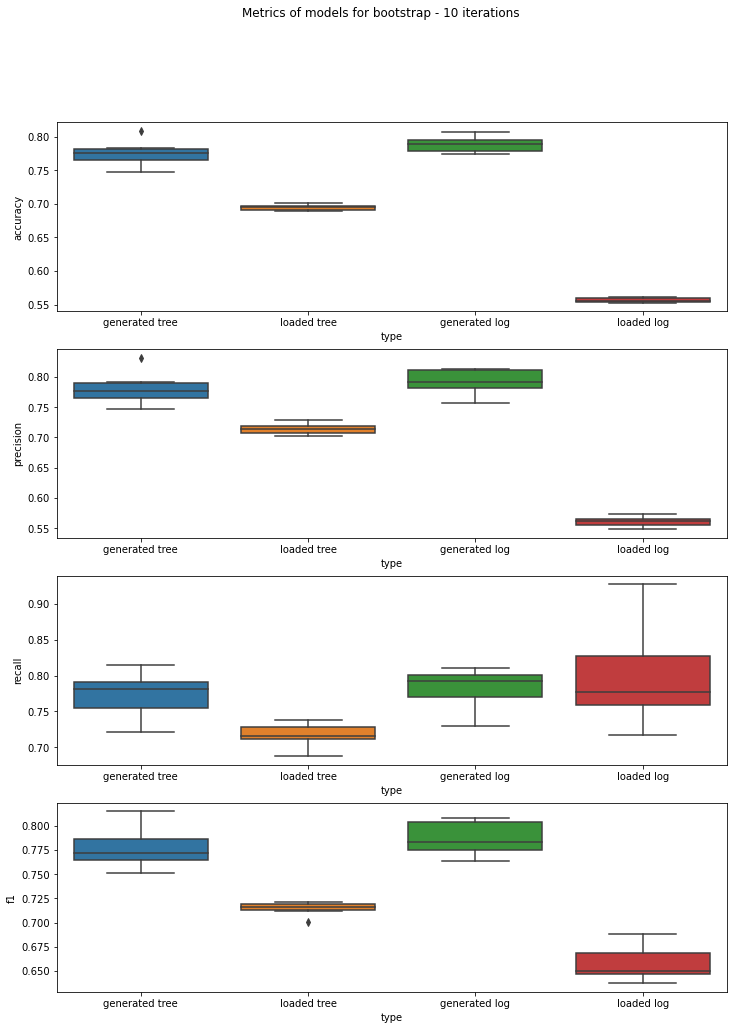

In [10]:
accuracies = []
precisions = []
recalls = []
f1s = []

for _ in range(iters):
    X, y = load_dataset()
    X_b, y_b = resample(X, y, n_samples=X.shape[0])
    X_b_oob = X.iloc[list(np.delete(X.index.values, np.unique(X_b.index.values))), :]
    y_b_oob = y.iloc[list(np.delete(X.index.values, np.unique(X_b.index.values)))]

    X_gen, y_gen = generate_dataset(1, 20, 1000)
    X_gen_b, y_gen_b = resample(X_gen, y_gen, n_samples=X_gen.shape[0])
    X_gen_b_oob = X_gen.iloc[list(np.delete(X_gen.index.values, np.unique(X_gen_b.index.values))), :]
    y_gen_b_oob = y_gen.iloc[list(np.delete(X_gen.index.values, np.unique(X_gen_b.index.values)))]

    scoring = ['accuracy', 'precision', 'recall', 'f1']

    # Decision tree
    model = DecisionTreeClassifier()

    model.fit(X_gen_b, y_gen_b)
    accuracies.append(
        0.63 * accuracy_score(y_gen_b_oob, model.predict(X_gen_b_oob)) +
        (1 - 0.632) * accuracy_score(y_gen_b, model.predict(X_gen_b))
    )
    precisions.append(
        0.63 * precision_score(y_gen_b_oob, model.predict(X_gen_b_oob)) +
        (1 - 0.632) * precision_score(y_gen_b, model.predict(X_gen_b))
    )
    recalls.append(
        0.63 * recall_score(y_gen_b_oob, model.predict(X_gen_b_oob)) +
        (1 - 0.632) * recall_score(y_gen_b, model.predict(X_gen_b))
    )
    f1s.append(
        0.63 * f1_score(y_gen_b_oob, model.predict(X_gen_b_oob)) +
        (1 - 0.632) * f1_score(y_gen_b, model.predict(X_gen_b))
    )

    model.fit(X_b, y_b)
    accuracies.append(
        0.63 * accuracy_score(y_b_oob, model.predict(X_b_oob)) +
        (1 - 0.632) * accuracy_score(y_b, model.predict(X_b))
    )
    precisions.append(
        0.63 * precision_score(y_b_oob, model.predict(X_b_oob)) +
        (1 - 0.632) * precision_score(y_b, model.predict(X_b))
    )
    recalls.append(
        0.63 * recall_score(y_b_oob, model.predict(X_b_oob)) +
        (1 - 0.632) * recall_score(y_b, model.predict(X_b))
    )
    f1s.append(
        0.63 * f1_score(y_b_oob, model.predict(X_b_oob)) +
        (1 - 0.632) * f1_score(y_b, model.predict(X_b))
    )

    # Logistic
    model = LogisticRegression()
    
    model.fit(X_gen_b, y_gen_b)
    accuracies.append(
        0.63 * accuracy_score(y_gen_b_oob, model.predict(X_gen_b_oob)) +
        (1 - 0.632) * accuracy_score(y_gen_b, model.predict(X_gen_b))
    )
    precisions.append(
        0.63 * precision_score(y_gen_b_oob, model.predict(X_gen_b_oob)) +
        (1 - 0.632) * precision_score(y_gen_b, model.predict(X_gen_b))
    )
    recalls.append(
        0.63 * recall_score(y_gen_b_oob, model.predict(X_gen_b_oob)) +
        (1 - 0.632) * recall_score(y_gen_b, model.predict(X_gen_b))
    )
    f1s.append(
        0.63 * f1_score(y_gen_b_oob, model.predict(X_gen_b_oob)) +
        (1 - 0.632) * f1_score(y_gen_b, model.predict(X_gen_b))
    )

    model.fit(X_b, y_b)
    accuracies.append(
        0.63 * accuracy_score(y_b_oob, model.predict(X_b_oob)) +
        (1 - 0.632) * accuracy_score(y_b, model.predict(X_b))
    )
    precisions.append(
        0.63 * precision_score(y_b_oob, model.predict(X_b_oob)) +
        (1 - 0.632) * precision_score(y_b, model.predict(X_b))
    )
    recalls.append(
        0.63 * recall_score(y_b_oob, model.predict(X_b_oob)) +
        (1 - 0.632) * recall_score(y_b, model.predict(X_b))
    )
    f1s.append(
        0.63 * f1_score(y_b_oob, model.predict(X_b_oob)) +
        (1 - 0.632) * f1_score(y_b, model.predict(X_b))
    )

results = pd.DataFrame({
    "accuracy": accuracies,
    "recall": recalls,
    "precision": precisions,
    "f1": f1s,
    "type": ["generated tree", "loaded tree", "generated log", "loaded log"] * iters,
})

f, axes = plt.subplots(4, 1, figsize=(12, 16))

sns.boxplot(data=results, x="type", y="accuracy", ax=axes[0])
sns.boxplot(data=results, x="type", y="precision", ax=axes[1])
sns.boxplot(data=results, x="type", y="recall", ax=axes[2])
sns.boxplot(data=results, x="type", y="f1", ax=axes[3])

plt.suptitle(f"Metrics of models for bootstrap - {iters} iterations")
plt.show()

### ROC and PR curve with different parameters

### Logistic Regression

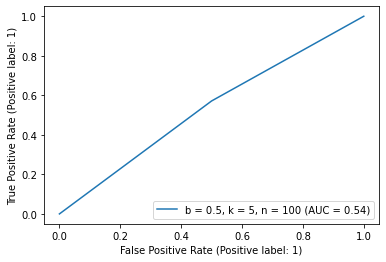

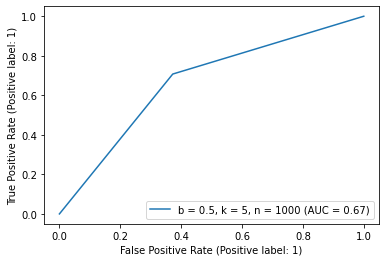

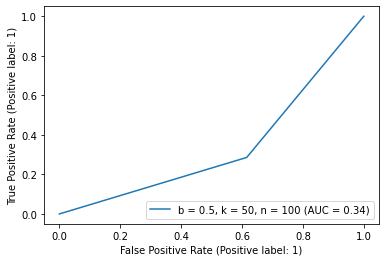

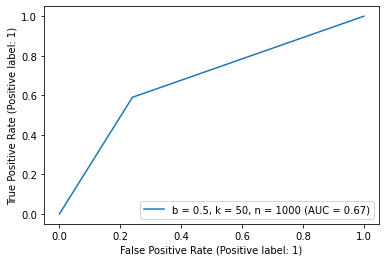

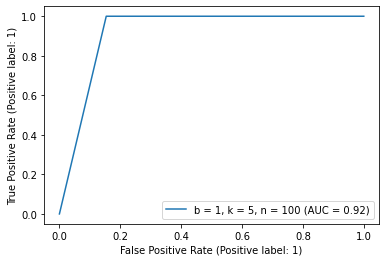

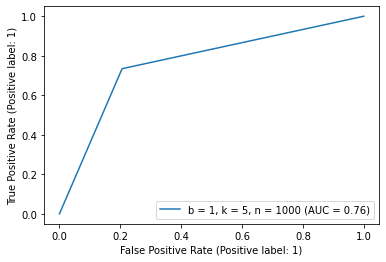

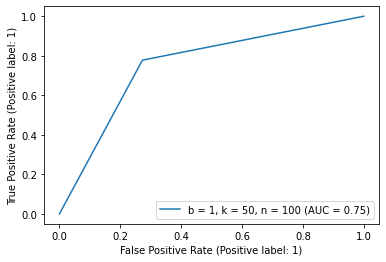

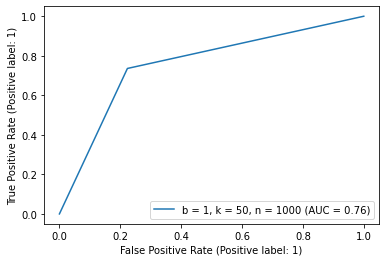

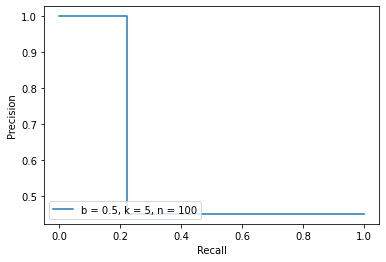

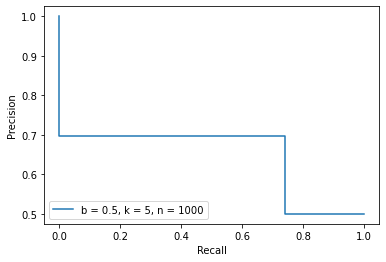

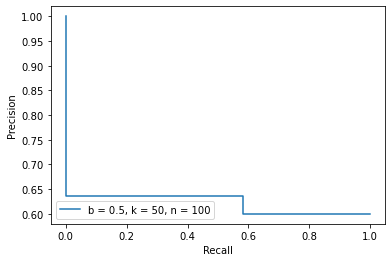

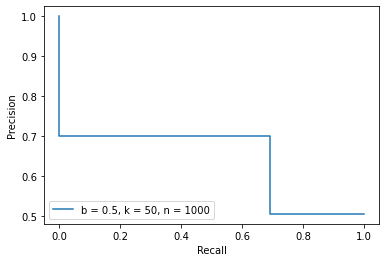

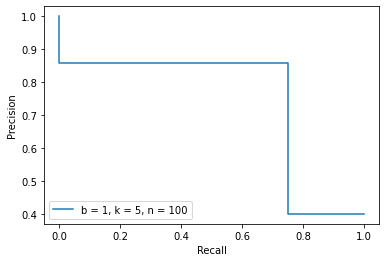

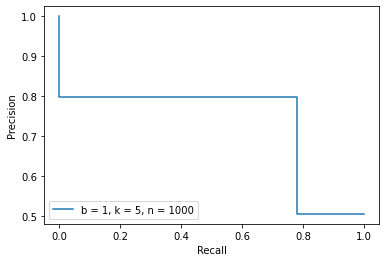

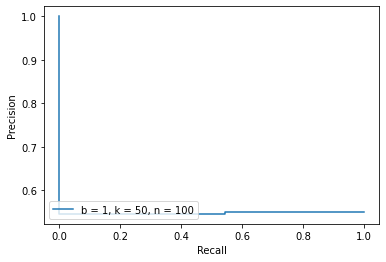

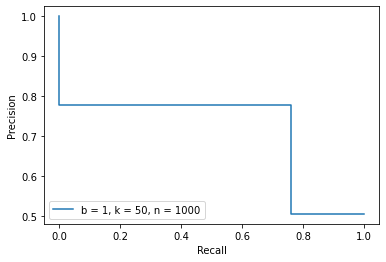

In [19]:
bs = [0.5, 1]
ks = [5, 50]
ns = [100, 1000]

for b in bs:
    for k in ks:
        for n in ns:
            X_gen, y_gen = generate_dataset(b, k, n)
            X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(
                X_gen, y_gen, 
                test_size=0.2, shuffle=True
            )

            model = LogisticRegression()
            model.fit(X_train_gen, y_train_gen)
            RocCurveDisplay.from_predictions(
                y_test_gen, model.predict(X_test_gen),
                name=f"{b = }, {k = }, {n = }"
            )

for b in bs:
    for k in ks:
        for n in ns:
            X_gen, y_gen = generate_dataset(b, k, n)
            X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(
                X_gen, y_gen, 
                test_size=0.2, shuffle=True
            )

            model = LogisticRegression()
            model.fit(X_train_gen, y_train_gen)
            precision, recall, _ = precision_recall_curve(y_test_gen, model.predict(X_test_gen))
            disp = PrecisionRecallDisplay(
                precision=precision, 
                recall=recall,
                estimator_name=f"{b = }, {k = }, {n = }",
            )
            disp.plot()

### DecisionTreeClassifier

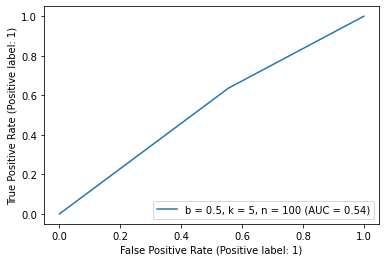

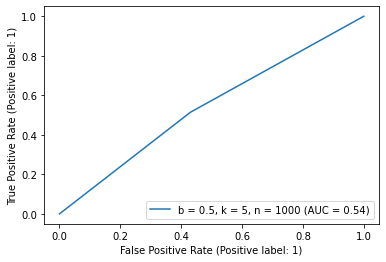

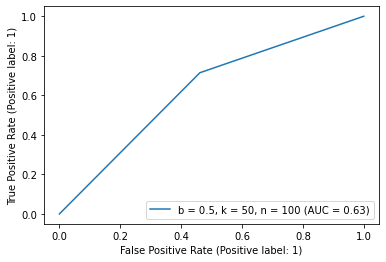

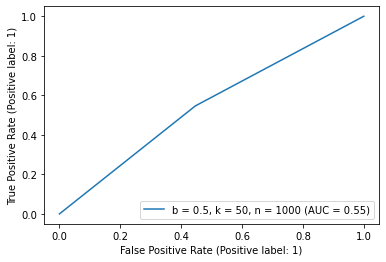

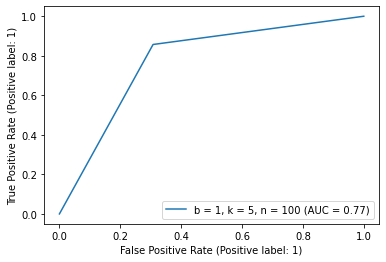

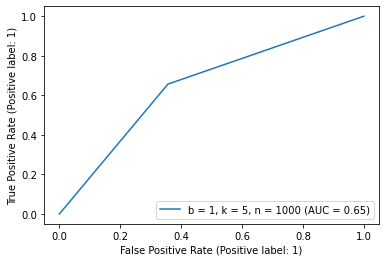

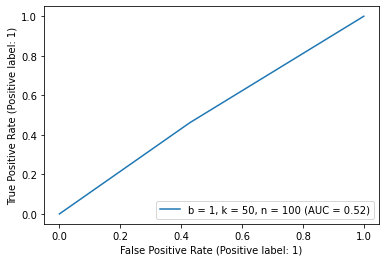

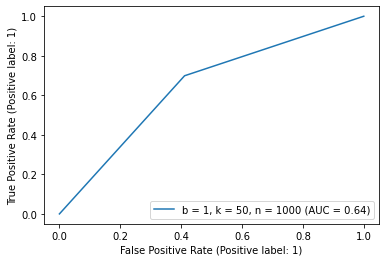

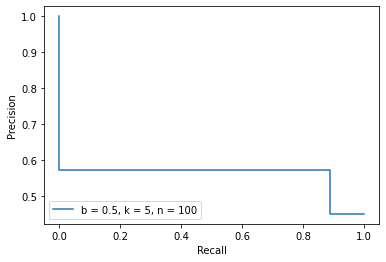

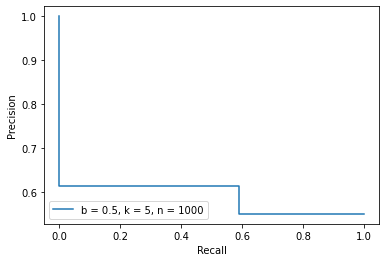

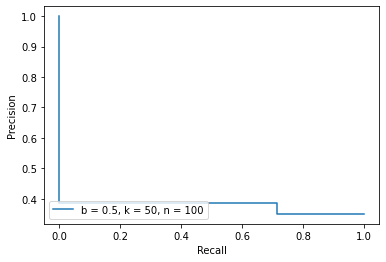

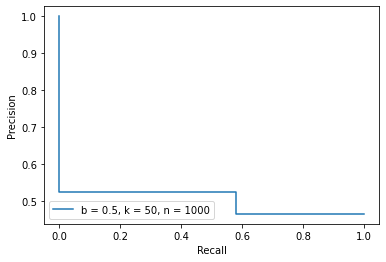

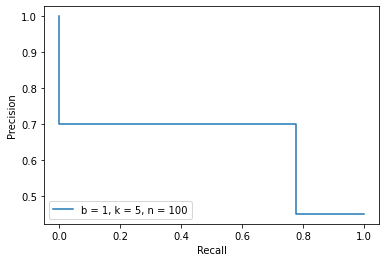

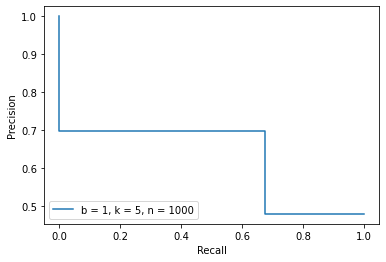

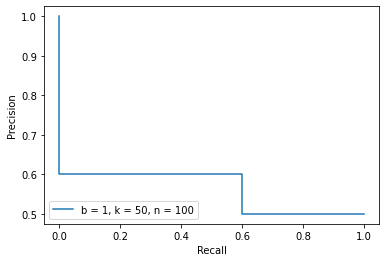

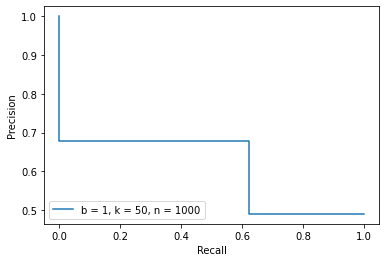

In [18]:
bs = [0.5, 1]
ks = [5, 50]
ns = [100, 1000]

for b in bs:
    for k in ks:
        for n in ns:
            X_gen, y_gen = generate_dataset(b, k, n)
            X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(
                X_gen, y_gen, 
                test_size=0.2, shuffle=True
            )

            model = DecisionTreeClassifier()
            model.fit(X_train_gen, y_train_gen)
            RocCurveDisplay.from_predictions(
                y_test_gen, model.predict(X_test_gen),
                name=f"{b = }, {k = }, {n = }"
            )

for b in bs:
    for k in ks:
        for n in ns:
            X_gen, y_gen = generate_dataset(b, k, n)
            X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(
                X_gen, y_gen, 
                test_size=0.2, shuffle=True
            )

            model = DecisionTreeClassifier()
            model.fit(X_train_gen, y_train_gen)
            precision, recall, _ = precision_recall_curve(y_test_gen, model.predict(X_test_gen))
            disp = PrecisionRecallDisplay(
                precision=precision, 
                recall=recall,
                estimator_name=f"{b = }, {k = }, {n = }",
            )
            disp.plot()